#Sentiment Analysis 
NLP's Sentiment Analysis subfield evaluates the inclination of people's opinions (Positive/Negative/Neutral) within unstructured text using sentiment analysis (also known as opinion mining or emotion AI). Rule-based and Machine Learning-based methods can be used for sentiment analysis. Rather than relying on machine learning models, Rule-Based method is a practical way to text analysis that doesn't require training. This method yields a set of guidelines for categorizing text as either positive, negative, or neutral. lexicons are a type of lexicon that is used to describe these rules. Thus, the Lexicon-based technique is referred to as a Rule-based method.  TextBlob, VADER, and SentiWordNet are among the most popular lexicon-based techniques (Bonthu, 2021).


A few examples of Sentiment Analysis in practice: 

The study of the market 

*   The study of the market
*   Monitoring of online social networks 
*   Brand sentiment or reputation study based on customer feedback
*   a study of consumer preferences

Sentiment analysis can be carried out at the sentence or document level, depending on the situation. As a general rule, the complexity of sentence-level analysis is linked to the fact that the semantic orientation of words is highly context-dependent, whereas the complexity of document-level mining is exacerbated by the fact that a single document may contain several opposing viewpoints on the same target.


Noura Farra and her colleagues investigated Sentiment Analysis of Arabic text at two different levels: the phrase level and the document level. In the field of Arabic sentiment Analysis, there is a lack of research in that area. They investigate two approaches to categorizing sentences at the sentence-level. One of the ways is to adopt a broad framework for the Arabic sentence, which is a novel grammatical approach in the field of Arabic grammar. A semantic dictionary with interactive learning capabilities was utilized to store and identify new polarity based on the roots of various words for their second approach, which is based on the semantic orientation of words and their associated frequency distributions. It is dependent on the semantic contributions of chunks in the document, which are dynamically separated into chunks and classified according to the semantic contributions of each chunk, that document-level classification can be achieved. This dynamic chunking approach can be utilized for Sentiment Analysis in other languages as well as English. In the final section, they propose a hierarchical classification system that uses the results of the sentence-level classifier as an input to the document-level classifier, a technique that has not previously been investigated for Arabic documents (Farra & Challita, 2010)

In another study the author evaluate the effectiveness of e-learning by examining people's attitudes regarding e-learning. In order to determine the polarity and subjectivity score of tweets' text, among other things, the author applies TextBlob, VADER (Valence Aware Dictionary for Sentiment Reasoning), and SentiWordNet, among other tools. Aside from that, due to the excellent classification accuracy of machine learning models, a variety of machine learning models have been utilized for sentiment categorization in the past. To create and assess the models quickly, two feature extraction techniques were used: TF-IDF and BoW, both of which are described in detail below. The phrase frequency-inverse document frequency approach is referred to as TF-IDF. During COVID-19, the reactions and tweets of Twitter users about online education were recorded and analyzed for information (Mujahid et al., 2021). 

To accomplish this sentiment analysis, various processes must be completed, including collecting data using web crawler, text processing, testing training data, and text classification using the Nave Bayes approach. For this project, we will use the Rule-based method to a new article on document. The Nave Bayes method is used to help classify people into groups or to determine the strength of sentiment in a community.



In [ ]:
%%capture
!pip install contractions

In [ ]:
import gspread
import pandas as pd
from google.colab import auth
from oauth2client.client import GoogleCredentials
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import gc
import string #
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
nltk.download('averaged_perceptron_tagger') #post tagging
import contractions
from nltk import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
import collections
import matplotlib.pyplot as plt



In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')


#Load & Merge the data

In [ ]:
df_7news = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/df_news7.xlsx",  names=['','Title', 'Article','Category','URL','News Outlet']) 

df_theAge = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/df_theAge-2.xlsx", names=['','Title', 'Article','Category','URL','News Outlet']) 

df_thenewDaily = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/df_newDaily.xlsx", names=['','Title', 'Article','Category','URL','News Outlet']) 

#delete index column 
df_7news = df_7news.drop([''], axis=1)
df_theAge = df_theAge.drop([''], axis=1)
df_thenewDaily =df_thenewDaily.drop([''], axis=1)
# reset index and merge dataframe and delete row with replay data
df = pd.concat([df_7news,df_theAge,df_thenewDaily],ignore_index=True)


In [ ]:
df.head()


,Title,Article,Category,URL,News Outlet
0,Bathurst 2021: Chaz Mostert secures pole with ...,Walkinshaw Andretti United star Chaz Mostert h...,sport,https://www.7news.com.au/sport/motorsport/lee-...,7news
1,India v New Zealand: Ajaz Patel spins his way ...,New Zealand spinner Ajaz Patel can’t believe h...,sport,https://www.7news.com.au/sport/cricket/perfect...,7news
2,Ashes 2021: Justin Langer breaks silence on Ti...,Justin Langer has kept the door open on Tim Pa...,sport,https://www.7news.com.au/sport/cricket/paine-c...,7news
3,Melbourne Storm NRL star Brandon Smith shopped...,Brandon Smith may have played his last game fo...,sport,https://www.7news.com.au/sport/rugby-league/sm...,7news
4,Novak Djokovic swiped for ‘exhausting’ respons...,Novak Djokovic is still uncertain whether he w...,sport,https://www.7news.com.au/sport/tennis/djokovic...,7news


Prior to preprocessing and cleaning the dataset, the data is analyzed based on the news outlet from which it originated. These figures represent the number of news stories published by three different news organizations. 



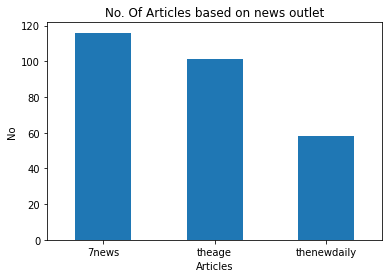

In [ ]:
df["News Outlet"].value_counts().plot(kind ='bar',rot=0)
plt.title('No. Of Articles based on news outlet')
plt.xlabel('Articles')
plt.ylabel('No')
plt.show()

In [ ]:
df.describe()

,Title,Article,Category,URL,News Outlet
count,275,259,275,275,275
unique,243,215,12,243,3
top,Tim Flannery: We must reduce emissions – we ha...,Replay,sport,https://thenewdaily.com.au/sport/tennis/2021/1...,7news
freq,4,13,128,4,116


Pre-processing and cleaning & normalization methods are required to eliminate unwanted data from the dataset before sentiment analysis can be performed; however, because the news was gathered from a variety of sources, there was no need to remove any duplicate data from the dataset. The text was retrieved from a news outlet and converted into a data frame.

The following measures were taken to ensure that the data was clean:
* Removed URLs from the text
* Removed stop words , expand the stop words to include   months and news outlet name
* Removed punctuation
* Removed numbers 
* Removed unnecessary spaces
* Remove non-ascii characters 
* Converting upper case to lower case. 
* Expand the shortened words such as this’s or they’re
* Drop any data without article information (label as Replay)
* Tokenization: Dividing a paragraph into sentences then dived  sentences into words.
* Lemmatization


The dataset count has been reduced to 246 (There were 29 rows with text label as Replay).

In [ ]:
print("Data Set before dropping row with Replay data: " , len(df))

df = df[df.Article.str.contains("Replay") == False]

print("Data Set after dropping row with Replay data: " , len(df))


Data Set before dropping row with Replay data:  275
Data Set after dropping row with Replay data:  246


In [ ]:
def clean_text(text):
  expanded_words = []    
  for word in text.split():
    # using contractions.fix to expand the shotened words
    edit_text = contractions.fix(word)
    # Remove punctuation
    edit_text = re.sub('[,\.!?^]', '',edit_text)
    edit_text = re.sub(r'http\S+', '', edit_text)
    edit_text = edit_text.lower()
    expanded_words.append(edit_text)                          
  
  expanded_text = ' '.join(expanded_words)
  # Remove non-ascii characters python
  expanded_text = expanded_text.encode('ascii',errors='ignore')

  return expanded_text.decode("utf-8")  




def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    stop_words.extend(['7news', 'the new daily','January','February','March',
                       'April','May','June','July','August','September','October'
                       ,'November','December'])
    for w_word_tokens in word_tokens:
      for z_word_tokens in w_word_tokens:
          if z_word_tokens.lower() not in stop_words: 
              filtered_sentence.append(z_word_tokens) 
    return filtered_sentence

def tokenSet(text):
  sequences = sent_tokenize(text)
  seq_tokens = [word_tokenize(seq) for seq in sequences]
  return seq_tokens



 
def lemmatize(token_text):
  lm = WordNetLemmatizer() #from nltk.stem.wordnet import WordNetLemmatizer
  lemmatized_tokens = [lm.lemmatize(token) for token in token_text]
  return lemmatized_tokens


In [ ]:
 #Call functions 
df["news_clean"] = [clean_text(txt) for txt in df['Article']]


df["token_news"] = [tokenSet(cleanTxt) for cleanTxt in df['news_clean']]
df["token_news"] = [remove_stopwords(tokenText) for tokenText in df['token_news']]
df["lemmatize"] = [lemmatize(lemmatized_tokens) for lemmatized_tokens in df['token_news']]


Our dataset columns will look like this after the function call. Our procedure reveals that the articles are tokenized and free of stopwords, hashtags, and links and lemmatization operation on them. Doing extra exploratory on our data to get the number of words and total length of each article. We can see that the average of number of words for all articles are 598 and verage total length is 3667. 

In [ ]:
df.head()

,Title,Article,Category,URL,News Outlet,news_clean,token_news,lemmatize
0,Bathurst 2021: Chaz Mostert secures pole with ...,Walkinshaw Andretti United star Chaz Mostert h...,sport,https://www.7news.com.au/sport/motorsport/lee-...,7news,walkinshaw andretti united star chaz mostert h...,"[walkinshaw, andretti, united, star, chaz, mos...","[walkinshaw, andretti, united, star, chaz, mos..."
1,India v New Zealand: Ajaz Patel spins his way ...,New Zealand spinner Ajaz Patel can’t believe h...,sport,https://www.7news.com.au/sport/cricket/perfect...,7news,new zealand spinner ajaz patel cannot believe ...,"[new, zealand, spinner, ajaz, patel, believe, ...","[new, zealand, spinner, ajaz, patel, believe, ..."
2,Ashes 2021: Justin Langer breaks silence on Ti...,Justin Langer has kept the door open on Tim Pa...,sport,https://www.7news.com.au/sport/cricket/paine-c...,7news,justin langer has kept the door open on tim pa...,"[justin, langer, kept, door, open, tim, paines...","[justin, langer, kept, door, open, tim, paine,..."
3,Melbourne Storm NRL star Brandon Smith shopped...,Brandon Smith may have played his last game fo...,sport,https://www.7news.com.au/sport/rugby-league/sm...,7news,brandon smith may have played his last game fo...,"[brandon, smith, may, played, last, game, melb...","[brandon, smith, may, played, last, game, melb..."
4,Novak Djokovic swiped for ‘exhausting’ respons...,Novak Djokovic is still uncertain whether he w...,sport,https://www.7news.com.au/sport/tennis/djokovic...,7news,novak djokovic is still uncertain whether he w...,"[novak, djokovic, still, uncertain, whether, t...","[novak, djokovic, still, uncertain, whether, t..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 274
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        246 non-null    object
 1   Article      246 non-null    object
 2   Category     246 non-null    object
 3   URL          246 non-null    object
 4   News Outlet  246 non-null    object
 5   news_clean   246 non-null    object
 6   token_news   246 non-null    object
 7   lemmatize    246 non-null    object
dtypes: object(8)
memory usage: 17.3+ KB


In [ ]:
# Get the article lengths
df['Length'] = df["Article"].str.len()
# Get the number of words in each article
df['Words'] = df["Article"].str.split().str.len()
# Display the new columns
display(df[["Length", "Words"]])
df.describe()


,Length,Words
0,3123,486
1,2657,459
2,2743,471
3,2648,448
4,2268,376
...,...,...
270,3563,569
271,3147,496
272,3165,531
273,1615,259


,Length,Words
count,246.000000,246.000000
mean,3667.402439,598.495935
std,2477.850015,415.218730
min,803.000000,135.000000
25%,2293.500000,382.250000
50%,3148.000000,528.000000
75%,4425.750000,719.000000
max,29096.000000,5106.000000


#Model Building

Following that, the pieces had been cleaned and preprocessed in order to make them available for further investigation. A machine learning algorithm was applied to categorize each item as either positive, negative, or neutral, depending on its overall polarity. Because our data had not been pre-classified, we used a lexicon-based model and machine learning approaches to sort the entries into the appropriate categories. Using TextBlob, a Python programming tool, it is possible to categorize article according to their polarity. The polarity of the text is used to categorize the emotions expressed in the text. Whenever the polarity of an object is less than zero, it is considered negative; however, when the polarity of an object is equal to or greater than zero, it is considered neutral or otherwise positive. 

In [ ]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return '-1'
    elif score == 0:
        return '0'
    else:
        return '1'


In [ ]:
fin_data = pd.DataFrame(df[['Article', 'lemmatize']])
fin_data['Subjectivity'] = fin_data['lemmatize'].apply(lambda x: getSubjectivity((' '.join(x))))
fin_data['Polarity'] = fin_data['lemmatize'].apply(lambda x: getPolarity(' '.join(x)))
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Article,lemmatize,Subjectivity,Polarity,Analysis
0,Walkinshaw Andretti United star Chaz Mostert h...,"[walkinshaw, andretti, united, star, chaz, mos...",0.372416,0.217538,1
1,New Zealand spinner Ajaz Patel can’t believe h...,"[new, zealand, spinner, ajaz, patel, believe, ...",0.526784,0.250320,1
2,Justin Langer has kept the door open on Tim Pa...,"[justin, langer, kept, door, open, tim, paine,...",0.418739,0.140279,1
3,Brandon Smith may have played his last game fo...,"[brandon, smith, may, played, last, game, melb...",0.401290,0.076323,1
4,Novak Djokovic is still uncertain whether he w...,"[novak, djokovic, still, uncertain, whether, t...",0.395531,0.117935,1


Looking at the graph below we can notice a clear imbalnce in our data. We can balance our data by using a form of oversampling called SMOTE. SMOTE is an oversampling method which uses synthetic samples to represent the minority population's characteristics. Oversampling can lead to overfitting, and this approach helps to alleviate this problem. It employs interpolation between positive instances to generate new instances.

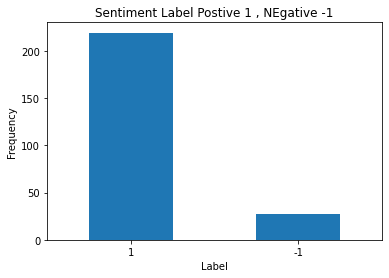

In [ ]:
import matplotlib.pyplot as plt

fin_data["Analysis"].value_counts().plot(kind ='bar',rot=0)
plt.title('Sentiment Label Postive 1 , NEgative -1')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In the next steps, we  first  split our data into 80% training and 20% testing sets. Then we fit the vectorizer it should only be used on the training set to avoid data leakage. As we saw in the above graph we have more postive articles than negative articles. Using imblearn we can import SMOTE library to perform oversampling. Since our predictor is binary we won't need to normlaise it, however we must  turn each string into a vector of integers before we can utilize it in any kind of machine learning task.


In [ ]:
count_label = fin_data.Analysis.value_counts()
print(count_label)

1     219
-1     27
Name: Analysis, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

df_article = fin_data['Article'].values
labels = fin_data['Analysis'].values
x_train, x_test, y_train, y_test = train_test_split(df_article, labels, test_size=0.2, random_state=1)

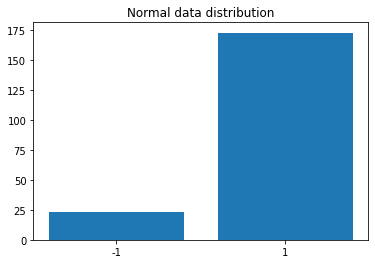

In [ ]:
plt.title('Normal data distribution')
w = collections.Counter(y_train)
plt.bar(w.keys(), w.values())
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(x_train)

X_train_transformed = vectorizer.transform(x_train)
X_test_transformed  = vectorizer.transform(x_test)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(X_train_transformed, y_train)

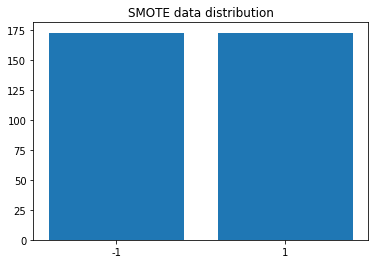

In [ ]:
plt.title('SMOTE data distribution')
c = collections.Counter(y_train_res)
plt.bar(c.keys(), c.values())
plt.show()

Now that the classes are  balanced for the train set. We can apply Naive Bayes to our data. In order to create predictions, Naive Bayes has correctly fitted all of the data we fed it. In fact, our score is a total 99 percent.

In [ ]:

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train_res, y_train_res)
y_pred_class = classifier.predict(X_test_transformed)
y_pred_proba = classifier.predict_proba(X_test_transformed)
accuracy = classifier.score(x_train_res, y_train_res)

from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred_class)

from sklearn.metrics import classification_report
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_class))

Accuracy: 0.9913294797687862
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           1       0.91      0.93      0.92        46

    accuracy                           0.86        50
   macro avg       0.46      0.47      0.46        50
weighted avg       0.84      0.86      0.85        50



In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('NLP_TASK1.ipynb')

--2021-12-08 10:42:27--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-12-08 10:42:27 (36.4 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/NLP_TASK1.ipynb to pdf
[NbConvertApp] Support files will be in NLP_TASK1_files/
[NbConvertApp] Making directory ./NLP_TASK1_files
[NbConvertApp] Making directory ./NLP_TASK1_files
[NbConvertApp] Making directory ./NLP_TASK1_files
[NbConvertApp] Making directory ./NLP_TASK1_files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'